<a href="https://colab.research.google.com/github/Trusha216/CarDetails/blob/car_details/Cardetails.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive

In [3]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
filepath="/content/drive/MyDrive/CAR DETAILS FROM CAR DEKHO (1).csv"

In [5]:
import numpy as np
import pandas as pd

**-> Data Collection**

**use car details dataset**

In [6]:
df=pd.read_csv(filepath)

In [7]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [8]:
df.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [9]:
df.shape

(4340, 8)

In [10]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')

**-> find and handle missing value**

In [11]:
df.isna().sum()

,0
name,0
year,0
selling_price,0
km_driven,0
fuel,0
seller_type,0
transmission,0
owner,0


In [12]:
df.isnull().sum()

,0
name,0
year,0
selling_price,0
km_driven,0
fuel,0
seller_type,0
transmission,0
owner,0


In [13]:
import matplotlib.pyplot as plt

**-> find and handle outliers**

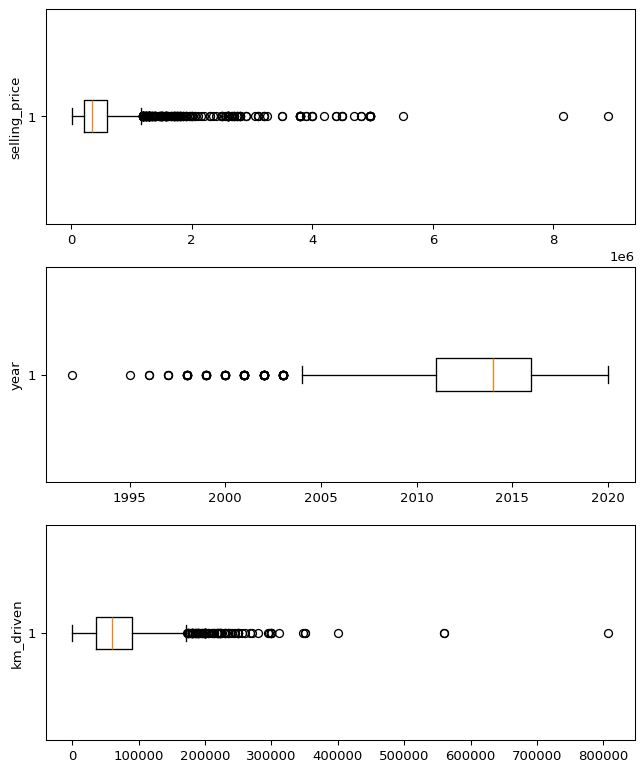

In [14]:
c1=df[["selling_price","year","km_driven"]]
fig,axes=plt.subplots(len(c1.columns),1,dpi=95,figsize=(8,10))
i=0
for col in c1.columns:
  axes[i].boxplot(df[col],vert=False)
  axes[i].set_ylabel(col)
  i=i+1
plt.show()

In [15]:
q1=df["selling_price"].quantile(0.25)
q3=df["selling_price"].quantile(0.75)
iqr=q3-q1
lower_bound=q1-1.5*iqr
upper_bound=q3+1.5*iqr
df=df[(df["selling_price"]>=lower_bound) & (df["selling_price"]<=upper_bound)]

In [16]:
q1=df["year"].quantile(0.25)
q3=df["year"].quantile(0.75)
iqr=q3-q1
lower_bound=q1-1.5*iqr
upper_bound=q3+1.5*iqr
df=df[(df["year"]>=lower_bound) & (df["year"]<=upper_bound)]

In [17]:
q1=df["km_driven"].quantile(0.25)
q3=df["km_driven"].quantile(0.75)
iqr=q3-q1
lower_bound=q1-1.5*iqr
upper_bound=q3+1.5*iqr
df=df[(df["km_driven"]>=lower_bound) & (df["km_driven"]<=upper_bound)]

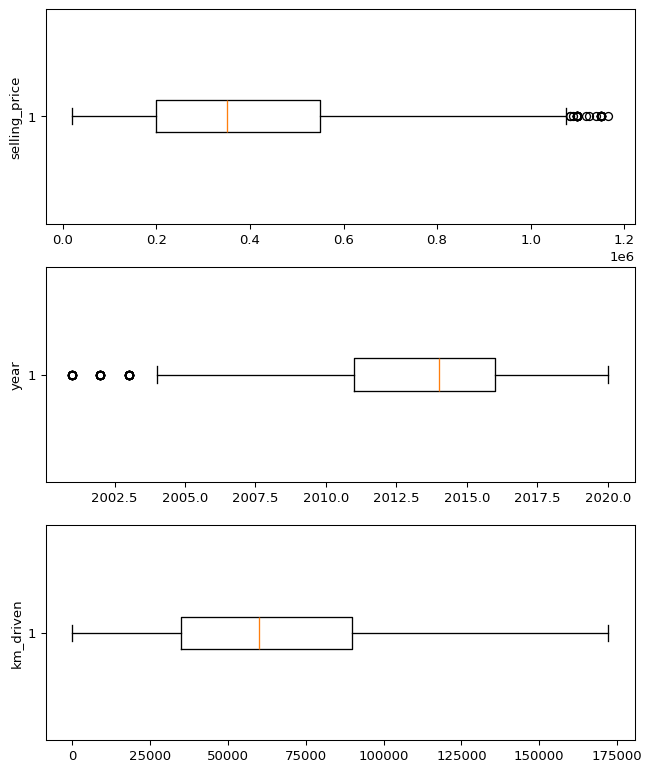

In [18]:
c1=df[["selling_price","year","km_driven"]]
fig,axes=plt.subplots(len(c1.columns),1,dpi=95,figsize=(8,10))
i=0
for col in c1.columns:
  axes[i].boxplot(df[col],vert=False)
  axes[i].set_ylabel(col)
  i=i+1
plt.show()

**->find correlation between selling_price,year and km_driven using heatmap (only for numerical data)**

In [19]:
selected_columns = ['selling_price', 'km_driven', 'year']
df_selected = df[selected_columns]

In [20]:
correlation_matrix = df_selected.corr()

In [21]:
correlation_matrix

,selling_price,km_driven,year
selling_price,1.000000,-0.285444,0.638756
km_driven,-0.285444,1.000000,-0.482762
year,0.638756,-0.482762,1.000000


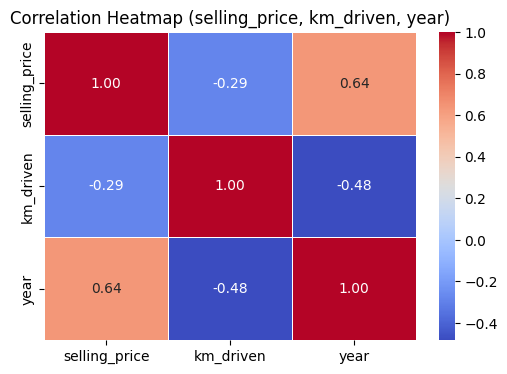

In [23]:
import seaborn as sns
plt.figure(figsize=(6, 4))

sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

plt.title("Correlation Heatmap (selling_price, km_driven, year)")
plt.show()


In [24]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [25]:
import seaborn as sns

**-> correlation between categorical and numerical data**

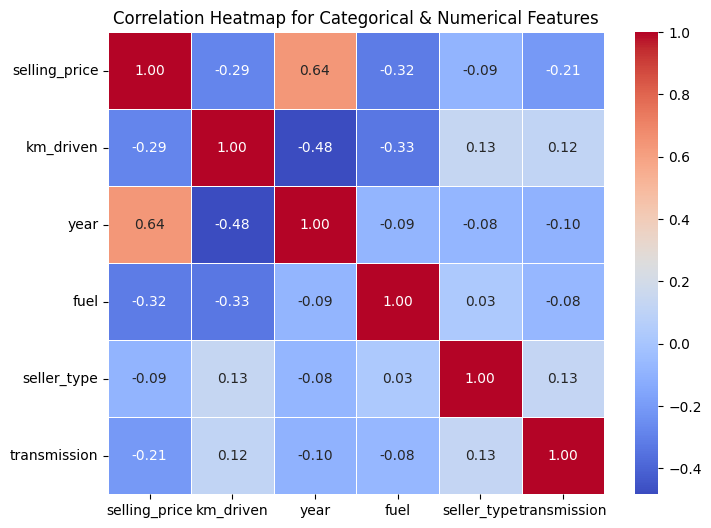

In [26]:

from scipy.stats import pointbiserialr, spearmanr

categorical_cols = ['fuel', 'seller_type','transmission']
numerical_cols = ['selling_price', 'km_driven', 'year']

df_encoded = df.copy()
for col in categorical_cols:
    df_encoded[col] = df_encoded[col].astype('category').cat.codes

correlation_matrix = df_encoded[numerical_cols + categorical_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap for Categorical & Numerical Features")
plt.show()


In [27]:
df['selling_price'].value_counts(normalize=True)

,proportion
selling_price,
300000,0.038766
250000,0.030604
350000,0.030094
550000,0.026524
600000,0.025759
...,...
1165000,0.000255
231999,0.000255
614000,0.000255


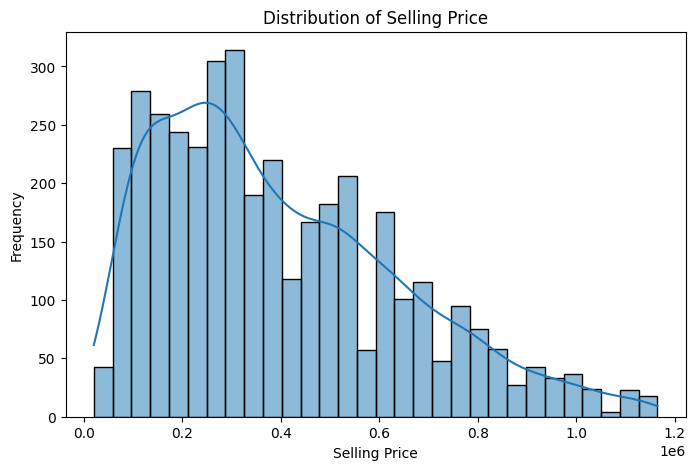

In [28]:
plt.figure(figsize=(8, 5))
sns.histplot(df['selling_price'], bins=30, kde=True)  # KDE smooths the curve
plt.title("Distribution of Selling Price")
plt.xlabel("Selling Price")
plt.ylabel("Frequency")
plt.show()

In [29]:
df['selling_price'].value_counts()

,count
selling_price,
300000,152
250000,120
350000,118
550000,104
600000,101
...,...
1165000,1
231999,1
614000,1


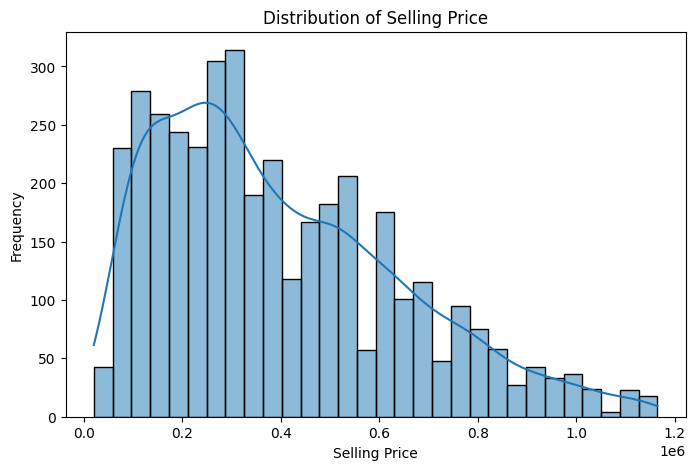

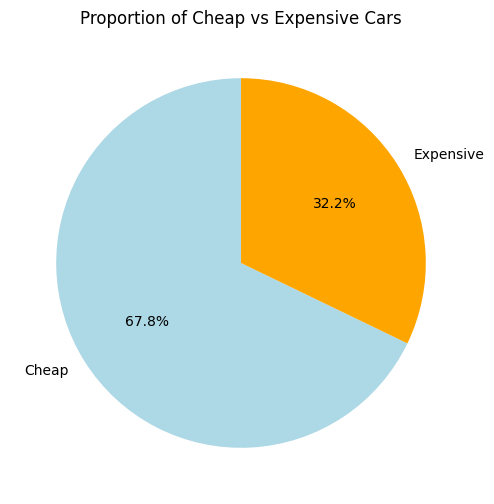

In [30]:
df['price_category'] = df['selling_price'].apply(lambda x: 'Cheap' if x < 500000 else 'Expensive')

# Count occurrences of each category
category_counts = df['price_category'].value_counts()

# Plot histogram of selling price distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['selling_price'], bins=30, kde=True)
plt.title("Distribution of Selling Price")
plt.xlabel("Selling Price")
plt.ylabel("Frequency")
plt.show()

# Plot pie chart for price category distribution
plt.figure(figsize=(6, 6))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', colors=['lightblue', 'orange'], startangle=90)
plt.title("Proportion of Cheap vs Expensive Cars")
plt.show()

In [31]:
year_counts = df['year'].value_counts()

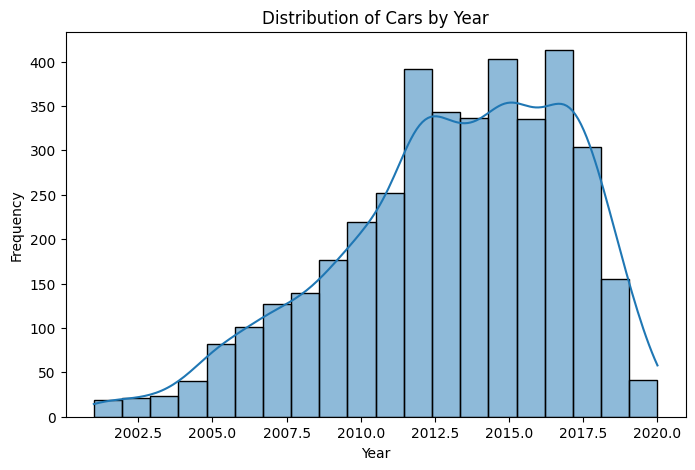

In [32]:
plt.figure(figsize=(8, 5))
sns.histplot(df['year'], bins=20, kde=True)
plt.title("Distribution of Cars by Year")
plt.xlabel("Year")
plt.ylabel("Frequency")
plt.show()

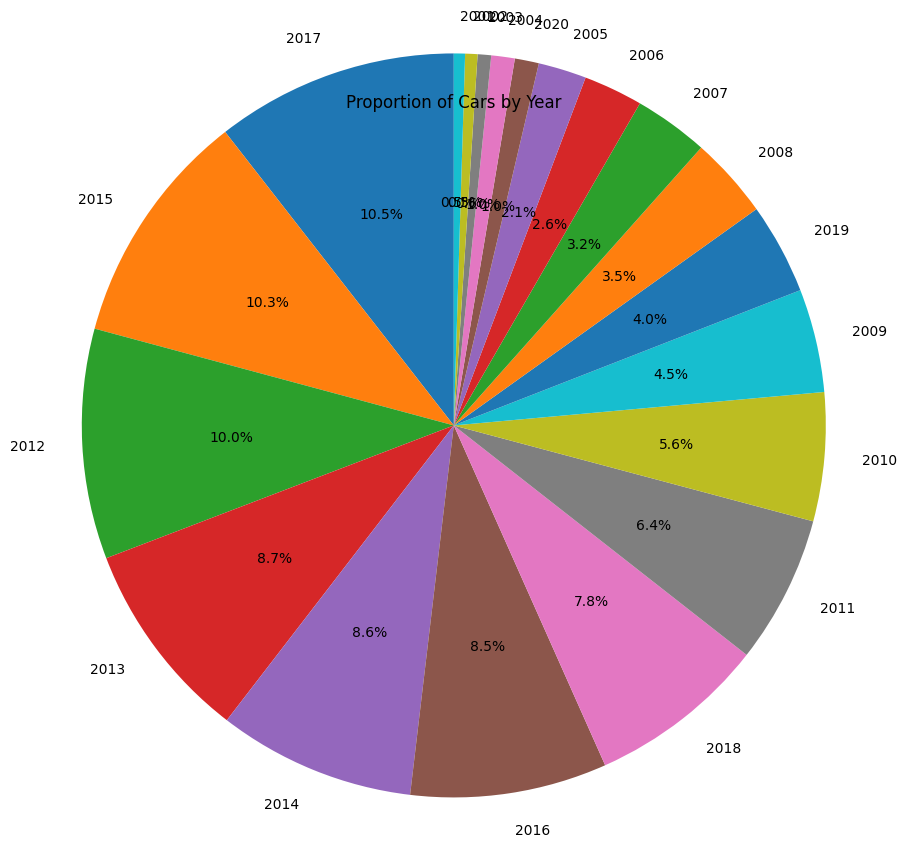

In [33]:
plt.figure(figsize=(8, 25))
plt.pie(year_counts, labels=year_counts.index, autopct='%1.1f%%', startangle=90,radius=1.5)
plt.title("Proportion of Cars by Year")
plt.show()

In [34]:
top_years = year_counts.nlargest(10)

In [35]:
df['year'].value_counts()

,count
year,
2017,413
2015,403
2012,392
2013,343
2014,336
2016,335
2018,304
2011,252
2010,219


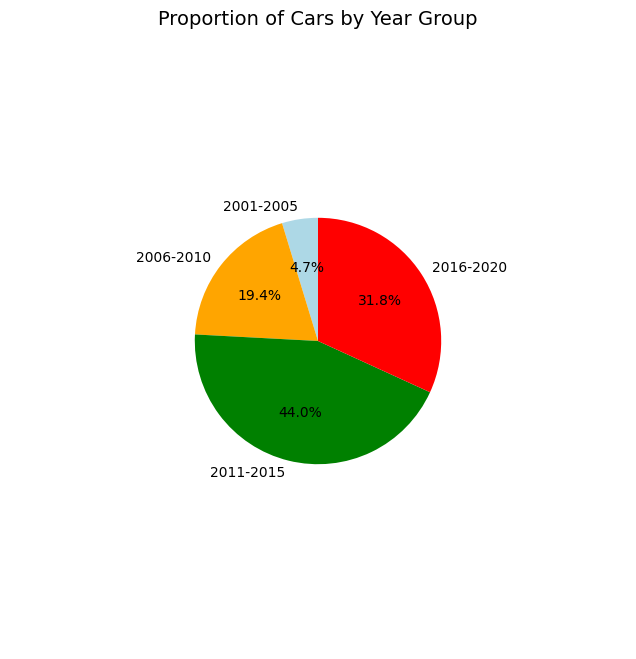

In [36]:
bins = [2000, 2005, 2010, 2015, 2020]
labels = ["2001-2005", "2006-2010", "2011-2015", "2016-2020"]

df['year_group'] = pd.cut(df['year'], bins=bins, labels=labels, right=True)

year_group_counts = df['year_group'].value_counts().sort_index()

plt.figure(figsize=(8, 8))
plt.pie(year_group_counts, labels=year_group_counts.index, autopct='%1.1f%%', startangle=90, colors=["lightblue", "orange", "green", "red"], radius=0.5)
plt.title("Proportion of Cars by Year Group", fontsize=14)
plt.show()

In [37]:
df.nunique()

,0
name,1342
year,20
selling_price,355
km_driven,679
fuel,5
seller_type,3
transmission,2
owner,5
price_category,2
year_group,4


In [38]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
name,3921,1342,Maruti Swift Dzire VDI,68,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year,3921.0,NaN,NaN,NaN,2013.104565,3.975856,2001.0,2011.0,2014.0,2016.0,2020.0
selling_price,3921.0,NaN,NaN,NaN,396103.938536,247408.137345,20000.0,200000.0,350000.0,550000.0,1165000.0
km_driven,3921.0,NaN,NaN,NaN,62958.699311,36290.619149,1.0,35000.0,60000.0,90000.0,172000.0
fuel,3921,5,Petrol,2046,NaN,NaN,NaN,NaN,NaN,NaN,NaN
seller_type,3921,3,Individual,2979,NaN,NaN,NaN,NaN,NaN,NaN,NaN
transmission,3921,2,Manual,3671,NaN,NaN,NaN,NaN,NaN,NaN,NaN
owner,3921,5,First Owner,2544,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price_category,3921,2,Cheap,2660,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year_group,3921,4,2011-2015,1726,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
df.describe()

,year,selling_price,km_driven
count,3921.000000,3.921000e+03,3921.000000
mean,2013.104565,3.961039e+05,62958.699311
std,3.975856,2.474081e+05,36290.619149
min,2001.000000,2.000000e+04,1.000000
25%,2011.000000,2.000000e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,5.500000e+05,90000.000000
max,2020.000000,1.165000e+06,172000.000000


**-> create a new column brand based on name column**

In [40]:
df["brand"] = df["name"].str.split(" ").str[0]

**-> change owner column categorical data to numeric form
where first owner = 1 , second owner = 2, third owner = 3 , fourth and above owner = 4 and test drive car =0**

In [41]:
map_with_owner = {
    "First Owner": 1,
    "Second Owner": 2,
    "Third Owner": 3,
    "Fourth & Above Owner": 4,
    "Test Drive Car": 0
}
df["owner"] = df["owner"].map(map_with_owner)

**-> change transmission categorical data to numeric from
where manual = 1 and automatic = 0**

In [42]:
t1={
    "Manual":1,
    "Automatic":0
}
df["transmission"] = df["transmission"].map(t1)

**-> rename owner column name**

In [43]:
df.rename(columns={"owner":"1st to 4th = Owner and 0 = test drive car"},inplace=True)

**-> rename transmission column name**

In [44]:
df.rename(columns={"transmission":"transmission(manual=1,autumatic=0)"},inplace=True)

**-> create a new column car_age using year**

In [45]:
df["car_age"] = 2025 - df["year"]

**-> make a new column km_per_year based on km_driven and car age**

In [46]:
df["km_per_year"] = (df["km_driven"] / df["car_age"].replace(0, 1)).astype(int)

**-> make a new column price_per_km based on selling_price and km_driven**

In [47]:
df["price_per_km"] = (df["selling_price"] / df["km_driven"].replace(0, 1)).round(2)

**-> create new column car type based on brand **

In [48]:
luxury_brands = ["Audi", "BMW", "Mercedes-Benz", "Jaguar", "Volvo", "Land"]
df["car_type"] = df["brand"].apply(lambda x: 1 if x in luxury_brands else 0)

**-> rename car_type column name**

In [49]:
df.rename(columns={"car_type":"car : luxury=1 & non-luxury=0"}, inplace=True)

**-> create new column based on fuel**

In [50]:
df["eco_friendly=1 & non_eco_friendly=0"] = df["fuel"].apply(lambda x: 1 if x in ["CNG", "Electric", "LPG"] else 0)

In [51]:
df["model"] = df["name"].str.split(" ").str[1]

In [52]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,"transmission(manual=1,autumatic=0)",1st to 4th = Owner and 0 = test drive car,price_category,year_group,brand,car_age,km_per_year,price_per_km,car : luxury=1 & non-luxury=0,eco_friendly=1 & non_eco_friendly=0,model
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,1,1,Cheap,2006-2010,Maruti,18,3888,0.86,0,0,800
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,1,1,Cheap,2006-2010,Maruti,18,2777,2.70,0,0,Wagon
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,1,1,Expensive,2011-2015,Hyundai,13,7692,6.00,0,0,Verna
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,1,1,Cheap,2016-2020,Datsun,8,5750,5.43,0,0,RediGO
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,1,2,Cheap,2011-2015,Honda,11,12818,3.19,0,0,Amaze


**-> handling missing values**

In [53]:
df.isna().sum()

,0
name,0
year,0
selling_price,0
km_driven,0
fuel,0
seller_type,0
"transmission(manual=1,autumatic=0)",0
1st to 4th = Owner and 0 = test drive car,0
price_category,0
year_group,0


In [54]:
df.isnull().sum()

,0
name,0
year,0
selling_price,0
km_driven,0
fuel,0
seller_type,0
"transmission(manual=1,autumatic=0)",0
1st to 4th = Owner and 0 = test drive car,0
price_category,0
year_group,0


In [55]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
name,3921,1342,Maruti Swift Dzire VDI,68,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year,3921.0,NaN,NaN,NaN,2013.104565,3.975856,2001.0,2011.0,2014.0,2016.0,2020.0
selling_price,3921.0,NaN,NaN,NaN,396103.938536,247408.137345,20000.0,200000.0,350000.0,550000.0,1165000.0
km_driven,3921.0,NaN,NaN,NaN,62958.699311,36290.619149,1.0,35000.0,60000.0,90000.0,172000.0
fuel,3921,5,Petrol,2046,NaN,NaN,NaN,NaN,NaN,NaN,NaN
seller_type,3921,3,Individual,2979,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"transmission(manual=1,autumatic=0)",3921.0,NaN,NaN,NaN,0.936241,0.244355,0.0,1.0,1.0,1.0,1.0
1st to 4th = Owner and 0 = test drive car,3921.0,NaN,NaN,NaN,1.44504,0.700293,0.0,1.0,1.0,2.0,4.0
price_category,3921,2,Cheap,2660,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year_group,3921,4,2011-2015,1726,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [56]:
df.dtypes

,0
name,object
year,int64
selling_price,int64
km_driven,int64
fuel,object
seller_type,object
"transmission(manual=1,autumatic=0)",int64
1st to 4th = Owner and 0 = test drive car,int64
price_category,object
year_group,category


In [57]:
df = df.drop('year_group', axis=1)

In [58]:
df=df.drop('price_category',axis=1)

In [59]:
y=df["selling_price"]

In [60]:
x=df.drop("selling_price",axis=1)

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [63]:
from sklearn.linear_model import LinearRegression

In [64]:
lr=LinearRegression()

In [65]:
from sklearn.preprocessing import OneHotEncoder

In [66]:
categorical_features=['name','fuel','seller_type','brand','model']

In [67]:
encoder=OneHotEncoder(sparse_output=False, handle_unknown='ignore')

In [68]:
encoded_data = encoder.fit_transform(x[categorical_features])

In [69]:
encoded_feature_names = encoder.get_feature_names_out(categorical_features)

In [70]:
encoded_df = pd.DataFrame(encoded_data, columns=encoded_feature_names, index=x.index)

In [71]:
x = x.drop(categorical_features, axis=1,errors='ignore')
x = pd.concat([x, encoded_df], axis=1)

In [72]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [73]:
lr.score(x_test, y_test)

0.8332235220603029

In [74]:
y_pred = lr.predict(x_test)

In [75]:
from sklearn.metrics import mean_squared_error

In [76]:
import math

In [77]:
math.sqrt(mean_squared_error(y_test, y_pred))

99824.45312480902

In [78]:
data_new=x_train[:1]

In [79]:
lr.predict(data_new)

array([824999.99992111])

In [80]:
y_train[:1]

,selling_price
1064,825000


In [81]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 0)


In [82]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)


In [83]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(x_train, y_train)

KNeighborsClassifier()

In [84]:
y_pred = classifier.predict(x_test)


In [85]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test,y_pred)
cr=classification_report(y_test,y_pred)

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

In [86]:
ac

0.14777070063694267

In [87]:
cm

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [88]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [89]:
mse

33489120642.538853

In [90]:
r2

0.4433840312849384

In [91]:
cr

'              precision    recall  f1-score   support\n\n       35000       0.00      0.00      0.00         1\n       40000       0.00      0.00      0.00         2\n       45000       0.00      0.00      0.00         0\n       50000       0.00      0.00      0.00         1\n       51111       0.00      0.00      0.00         1\n       52000       0.67      1.00      0.80         2\n       55000       0.00      0.00      0.00         2\n       58000       0.00      0.00      0.00         1\n       60000       0.00      0.00      0.00         0\n       62000       0.00      0.00      0.00         1\n       65000       0.00      0.00      0.00         1\n       69000       1.00      1.00      1.00         1\n       70000       0.43      0.38      0.40         8\n       72000       0.00      0.00      0.00         0\n       73000       0.50      1.00      0.67         1\n       75000       0.12      0.17      0.14         6\n       79000       0.00      0.00      0.00         2\n       

In [92]:
!pip install dtale

In [93]:
import dtale #D-tale library used for column analysis

In [94]:
dtale.show(df)

http://95a77b7834f2:40000/dtale/main/1

In [95]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission(manual=1,autumatic=0)',
       '1st to 4th = Owner and 0 = test drive car', 'brand', 'car_age',
       'km_per_year', 'price_per_km', 'car : luxury=1 & non-luxury=0',
       'eco_friendly=1 & non_eco_friendly=0', 'model'],
      dtype='object')

In [96]:
x=df[['name', 'year', 'km_driven', 'fuel', 'seller_type',
       'transmission(manual=1,autumatic=0)',
       '1st to 4th = Owner and 0 = test drive car', 'brand', 'car_age',
       'km_per_year', 'price_per_km', 'car : luxury=1 & non-luxury=0',
       'eco_friendly=1 & non_eco_friendly=0', 'model']]

In [97]:
y=df['selling_price']

In [99]:
x = pd.get_dummies(x, drop_first=True)

In [100]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [102]:
model = LinearRegression()

model.fit(x_train, y_train)

LinearRegression()

In [103]:
y_pred_train = model.predict(x_train)

y_pred_test = model.predict(x_test)

In [105]:
from sklearn.metrics import mean_squared_error

In [108]:
train_mse = mean_squared_error(y_train, y_pred_train)

test_rmse = mean_squared_error(y_test, y_pred_test)

In [109]:
train_mse

3276813556.514482

In [110]:
test_rmse

9966493856.608408

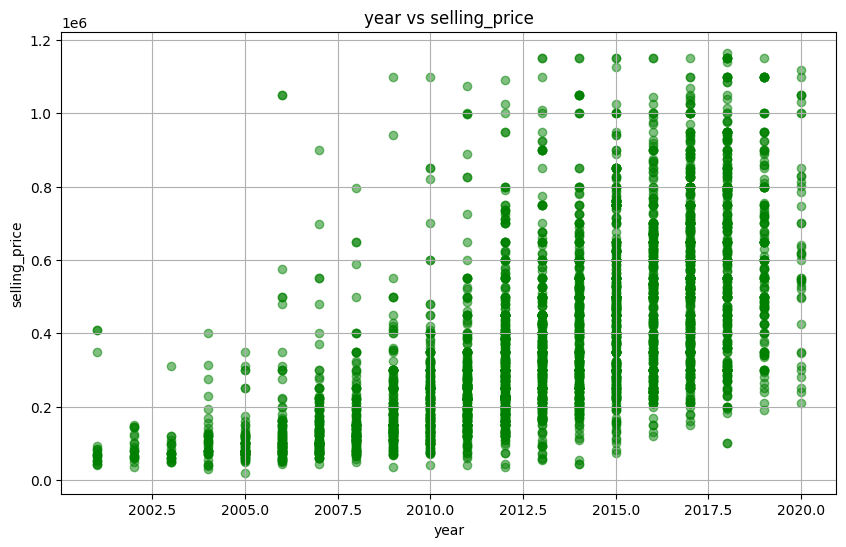

In [114]:
plt.figure(figsize=(10, 6))

plt.scatter(df['year'], df['selling_price'], color='green', alpha=0.5)

plt.title('year vs selling_price')

plt.xlabel('year')

plt.ylabel('selling_price')

plt.grid(True)

plt.show()

In [116]:
df.head(2)

,name,year,selling_price,km_driven,fuel,seller_type,"transmission(manual=1,autumatic=0)",1st to 4th = Owner and 0 = test drive car,brand,car_age,km_per_year,price_per_km,car : luxury=1 & non-luxury=0,eco_friendly=1 & non_eco_friendly=0,model
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,1,1,Maruti,18,3888,0.86,0,0,800
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,1,1,Maruti,18,2777,2.70,0,0,Wagon


In [145]:
brand_seller_counts = df.groupby(['brand', 'selling_price','year','fuel','transmission(manual=1,autumatic=0)']).size().reset_index(name='counts')

In [146]:
brand_seller_counts

,brand,selling_price,year,fuel,"transmission(manual=1,autumatic=0)",counts
0,Ambassador,50000,2002,Diesel,1,1
1,Ambassador,120000,2005,Diesel,1,2
2,Ambassador,430000,2012,Petrol,1,1
3,Audi,650000,2008,Petrol,0,1
4,Audi,850000,2010,Diesel,0,1
...,...,...,...,...,...,...
2618,Volkswagen,890000,2017,Diesel,0,2
2619,Volkswagen,936999,2017,Petrol,1,1
2620,Volkswagen,940000,2009,Diesel,1,1
2621,Volkswagen,950000,2019,Petrol,0,1


In [147]:
brand_seller_counts.max()

,0
brand,Volkswagen
selling_price,1165000
year,2020
fuel,Petrol
"transmission(manual=1,autumatic=0)",1
counts,17


In [148]:
brand_seller_counts.min()

,0
brand,Ambassador
selling_price,20000
year,2001
fuel,CNG
"transmission(manual=1,autumatic=0)",0
counts,1


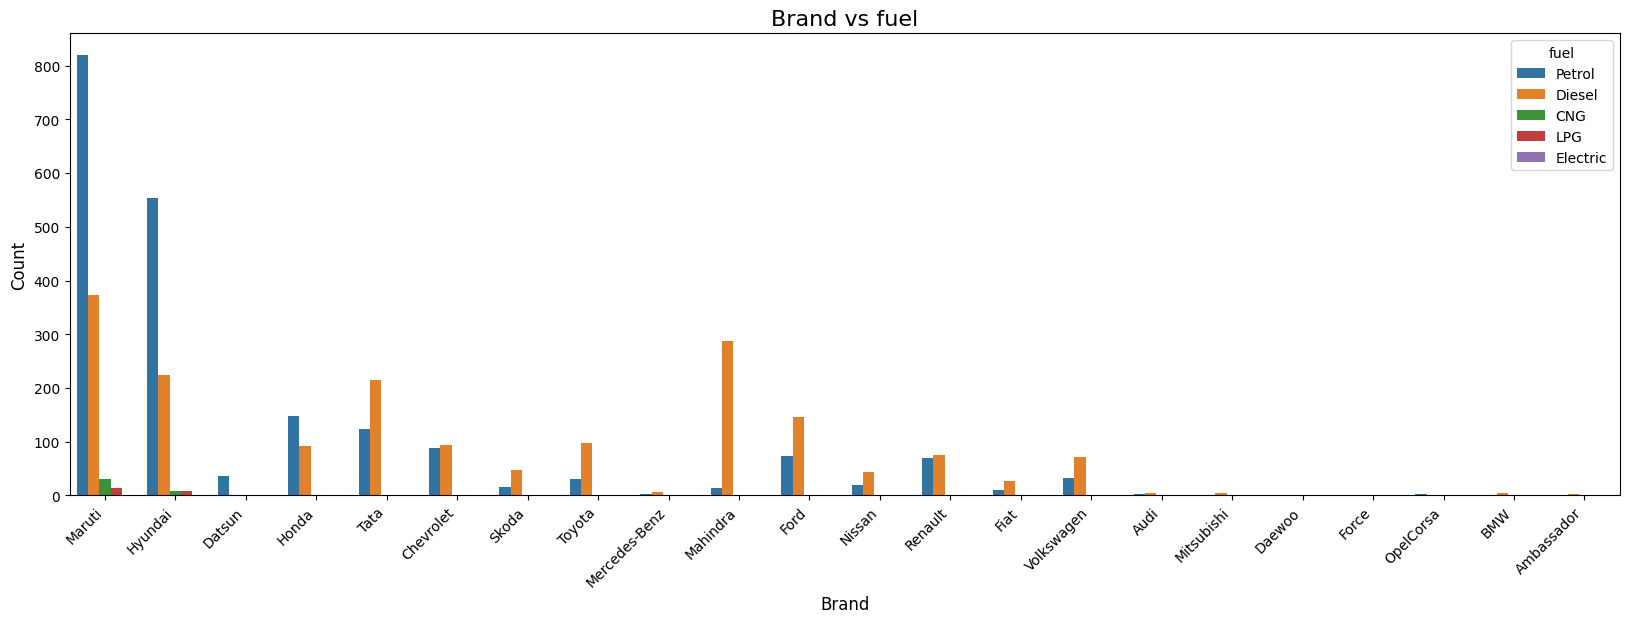

In [136]:

plt.figure(figsize=(20, 6))
sns.countplot(x='brand', hue='fuel', data=df)
plt.title('Brand vs fuel', fontsize=16)
plt.xlabel('Brand', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.show()